# Machine Learning with Python

Have not yet decided which data sets im going to use. probably the typical example sets like Iris, Titanic etc. 
Notation will be mostly based on scikit_learn convetions and the book 'Elements of statisitical learning' by Hasties. 
Most probably I will steal some content from this guy https://github.com/donnemartin/data-science-ipython-notebooks


My draft for an outline:

    1. Start with very short primer on the mathematical formulation of the problem so everybody is familar with common notations often found in books or tutorials elsewhere. (Maybe 10 Minutes)     
    2. Some general remarks on scikit-learn and its structure. 
    3. Read and visualize an example data set (don't know which yet. Maybe Iris.)
    4. Unsuppervised Learning aka. clustering algorithms like KNN (and maybe  density based clustering like DBscan)
    5. Supervised Learning example and general formulation (loss functions and such). 
    6. Show some algorithms like naive bayes, SVMs, decission trees, neural nets..
    7. Validation. Cross validation, RoC curves etc. 
    
 

> # In God we trust, all others bring data.

>William Edwards Deming (1900-1993)


# A word on what machines can (and cannot) do

The term *Artifical Inteligence* was coined by John McArthy for the 1956 Dartmouth Conference. 

The idea of a *mechanical brain* is much older. 

![The Turk](https://upload.wikimedia.org/wikipedia/commons/8/8b/Tuerkischer_schachspieler_windisch4.jpg)   


The Church-Turing Thesis

> Every effectively calculable function is a computable function.

Using Turings definitions of computability

> "We shall use the expression 'computable function' to mean a function calculable by a machine, and let 'effectively calculable' refer to the intuitive idea without particular identification with any one of these definitions."

In other words:

> If something is intuitivly calculable (in whatever manner you can think of), it can be computed by a machine. 

> If something can be computed by a machine, it can be computed by a brain. (given enough time)

__Are computers just as good as human brains then?__

They seem to work well together.

Computer assisted proof of the Four-Color-Problem in 1989:
    
>  ...part of the proof was verified in over 400 pages of microfiche, which had to be checked by hand with the assistance of Haken's daughter...


__Well, no.__

Easy problem for machines:

* Is this text written in the english language?

Unsolvable problem for machines:

* What does this text mean?

![Alice checking for Poison](../resources/alice.jpg)

Machines are limited

* Mapping syntax and symbols to semantics and objects in the real world is something inherently human (or intelligent).

* Some problems are not computable (for either man or machine) however humans can write down these problems (not the solutions) and mathematically __prove__ that they cannot be computed.

* There is not really a powerfull formal equivalent for human creativity.

* Machines cannot "learn"

# Machine Learning



## Mathematical Notation and Problem Description

*For more details see "Elements of statistical Learning" by Trevor Hastie.* 


One definition of supervised machine learning:

> Given a $N \times p$ matrix $\mathbf{X}$ matrix and some associated output vector $\mathbf{Y} \in \mathbb{R}^N$,
 find a function $f(X) = \hat{Y}$ that takes a vector $X \in \mathbb{R}^p$ and returns a prediction for $\hat{Y}$
 where some "loss function" $L(Y, f(X))$ is minimized for all $X$.

##### The Titanic Example

Learning from mistakes. Who survived the Titanic disaster in 1912?

Passenger list of name, gender, age and the price they paid for the ticket.  

![Much Wow](../resources/nyt_titanic.jpg)

In [1]:
%matplotlib inline
from ml_helpers import plots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(context='notebook')
pd.options.display.max_rows = 10

def read_titanic():
    data = pd.read_csv('../resources/titanic_train.csv', index_col='PassengerId').dropna(subset=['Age'])
    data['Survived_Code'] = data.Survived
    data['Pclass_Code'] = data.Pclass
    data.Survived = pd.Categorical.from_codes(data.Survived, categories=['no', 'yes'])
    data.Pclass = pd.Categorical.from_codes(data.Pclass - 1, categories=['1st', '2nd', '3rd'])
    data.Sex = pd.Categorical(data.Sex)
    data['Sex_Code'] = data.Sex.cat.codes
    return data

In [2]:
data = read_titanic()
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_Code,Pclass_Code,Sex_Code
PassengerId,,,,,,,,,,,,,,
1,no,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,3,1
2,yes,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0
3,yes,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,3,0
4,yes,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0
5,no,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,no,3rd,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,0,3,0
887,no,2nd,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,2,1
888,yes,1st,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1,0


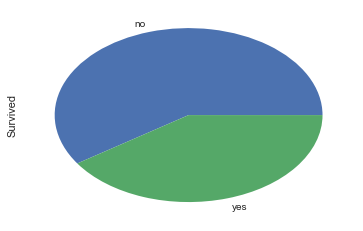

In [3]:
data.Survived.value_counts().plot.pie()

Given a new vector $X = (Name, Class, Age, Sex)$ can we find a function $f_{survival}(X) \in \{{yes, no}\}$ that accurately predicts the survival of the passengers in most cases?


Well yes. Let's presume rich people get to go into lifeboats.

```
def f_class(passenger):
    if passenger.Pclass == 1:
        return 'yes'
    else:
        return 'no'
```


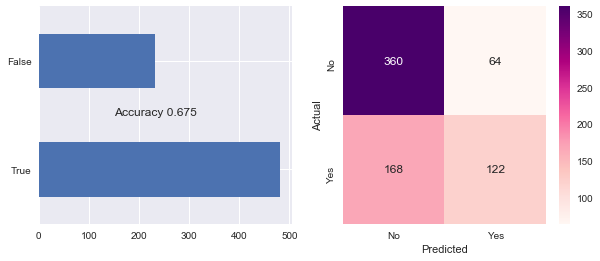

In [4]:
def f_class(passenger_class):
    return 'yes' if passenger_class == '1st' else 'no'

prediction = data['Pclass'].apply(f_class)
truth = data['Survived']

plots.plot_bars_and_confusion(truth=truth, prediction=prediction)

What about the women? Maybe we get a better predictor.
 
```
def f_survival(passenger):
    if passenger.Sex == 'female':
        return 'yes'
    else:
        return 'no'
```

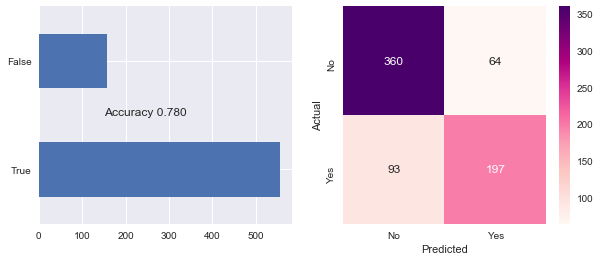

In [5]:
def f_sex(passenger_sex):
    return 'yes' if passenger_sex == 'female' else 'no'

data = read_titanic()
truth = data['Survived']
prediction = data['Sex'].apply(f_sex)

plots.plot_bars_and_confusion(truth=truth, prediction=prediction)


Accuracy is the fraction of correctly labeled observations in the data.

$$
    accuracy(\mathbf{y}, \mathbf{\hat{y}}) = \frac{1}{N} \sum_{i = 1}^N \mathbb{1}(y_i = \hat{y}_i)
$$

We saw that classifying by gender alone gave an accuracy of 78%


## Linear Models

Can we improve our predictor by combining more variables into one predictor?

Lets presume a linear weighted combination of variables:

$$
f(X)= \hat{\beta}_0 + \sum_{j=1}^p X_j \hat{\beta}_j
$$

or in our case when combining sex and money:

$$
f(X)= \hat{\beta}_0 + X_{Class} \hat{\beta}_{Class} + X_{Sex} \hat{\beta}_{Sex}  
$$

How do you find those weights?

Choose and then optimize a loss function. In this case the popular residual sum of squares 

$$L(\beta) = RSS(\mathbf{\beta}) = \sum_{i=1}^N (Y_i - X_i^T \beta)^2 $$



Rewrite the problem in matrix form:

\begin{align}
X^T &= (1, Class, Sex) \\ 
\mathbf{\hat{\beta}}^T &= (\hat{\beta}_0, \hat{\beta}_{Class}, \hat{\beta}_{Sex}) \\
\mathbf{y} &= {Y_1, \ldots, Y_N} 
\end{align}

Makes the formulation more compact for the predictor

$$
\hat{\mathbf{y}} = X^T \hat{\beta}
$$

and the loss function

$$
RSS(\beta) = (\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta )
$$


Optimize loss function just like any other function. Set the derivative equals to zero.

$$
{RSS}^\prime(\beta) =  \mathbf{X}^T (\mathbf{y} - \mathbf{X} \beta ) \stackrel{!}{=} 0
$$

Solving for $\beta$ leads to

$$
\hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

You just invented Linear Least Squares regression.

Now we can define a function to predict passenger survival according to

$$
\hat{Y} = \begin{cases}
\text{Yes}, & \text{if $ f(X) \gt 0.5$} \\
\text{No}, & \text{if $ f(X) \le 0.5$}
\end{cases}
$$ 

##### Excersise 1: Linear Regression and Classification (10 - 15 minutes)

Create an artificial 2D dataset with two classes and use the least squares method to seperate them.

1. Create 2D gaussians of data for classes A and B
    
        A = np.random.multivariate_normal(mean=[1, 1], cov=[[2,1], [1,2]], size=200)
        B = ....
    
2. Plot the distributions into one scatter plot
        
        plt.scatter(x_coordinates, y_coordinates, s=size_of_points)
        
3. Create the $X$ matrix and the output (label) vector $Y$
        
        X = np.vstack([A, B])
        Y = [0, 0, 0, ..., 1, 1, 1, ...]
        
4. Use scikit-learn's linear regressor to find the parameters for $f(X_1, X_2) = \hat{Y}$.

        from sklearn import linear_model
        reg = linear_model.LinearRegression()
        reg.fit(X, Y)
        b_1, b_2 = reg.coef_
        b_0 = reg.intercept_

5. Draw a dashed line into the plot where $f(X_1, X_2) = 0.5$.

        x1s = np.linspace(-8, 8)
        x2s = ...
        ...
        plt.plot(x1s, x2s, color='gray', linestyle='--')

In [6]:
from sklearn import linear_model
np.random.seed(1234)
# create two gaussians
A = np.random.multivariate_normal(mean=[1, 1], cov=[[2,1], [1,2]], size=200)
B = np.random.multivariate_normal(mean=[-2, -2], cov=[[2,0], [0,2]], size=200)

#get them into proper matrix form
X = np.vstack([A, B])
Y = np.hstack([np.zeros(len(A)), np.ones(len(B))])

# train the linear regressor and save the coefficents
reg = linear_model.LinearRegression()
reg.fit(X, Y)
b_1, b_2 = reg.coef_
b_0 = reg.intercept_

# solve the function y = b_0 + b_1*X_1 + b_2 * X_2 for X2
x1s = np.linspace(-8, 8)
x2s = (0.5 - b_0 - b_1*x1s)/b_2

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


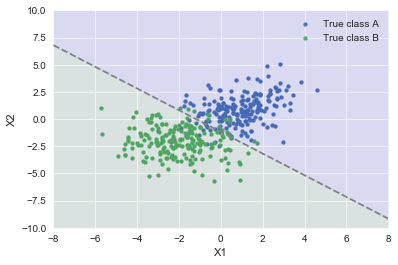

In [7]:
plots.plot_exercise_1(A, B, x1s, x2s)

We just *learned* the parameters for a statistical model based on labeled data.

Can a linear classification improve the classification of the Titanic dataset case?

We have to evaluate our 'learned' model independent test set

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

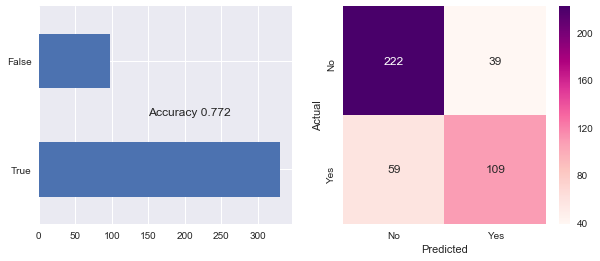

In [8]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = data[['Sex_Code', 'Pclass_Code', 'Fare', 'Age']]
y = data['Survived_Code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_prediction = reg.predict(X_test)
y_prediction = np.where(y_prediction > 0.5, 1, 0)

plots.plot_bars_and_confusion(truth=y_test, prediction=y_prediction)

The model does not seem to improve the classification to a large degree. 


We will talk more about properly validating models later. 

[<matplotlib.text.Text at 0x1114505f8>, <matplotlib.text.Text at 0x11149c278>]

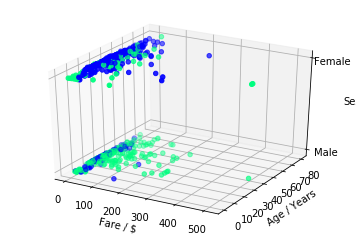

In [9]:
from mpl_toolkits.mplot3d import Axes3D
sns.reset_orig()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Fare, data.Age, data.Sex_Code, c=data.Survived_Code, cmap='winter')
ax.set_xlabel('Fare / $')
ax.set_ylabel('Age / Years')
ax.set_zlabel('Sex')
ax.set_zticks([0,1])
ax.set_zticklabels(['Male', 'Female'])

In [10]:
sns.set(context='notebook')


## Non-Linear Separation Models

The basic assumption underlying the least squares approach is that the model is linear in the observed Variables. 
This works for data which can be separated by a linear function (a hyperplane in the parameter space).

But what if that isn't the case?


(-2, 6)

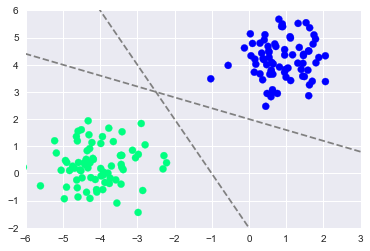

In [11]:
# many possible lines to separate the data
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=150, centers=2,
                  random_state=3, cluster_std=0.70)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

xs = np.linspace(-6.5, 3, 2)
plt.plot(xs, -2 * xs - 2, color='gray', linestyle='--')
plt.plot(xs, -0.4 * xs + 2, color='gray', linestyle='--')
plt.xlim([-6, 3])
plt.ylim([-2, 6])

#### The Support Vector Machine

Again we minimze a loss function.

$$
L(\beta) = C \max(0, 1 - y_i \beta^T x_i) + \frac{\lambda}{2}||{\beta}||^2
$$

Support Vector Machines try to find the hyperplane which maximimizes the margin to the points in different classes in the parameter space.

$C$ and $\lambda$ are two parameters which can be chosen beforehand. 

<p class="note"> Note that to fit the definition above, the label encoding has to be $y_i \in {-1, 1}$</p>

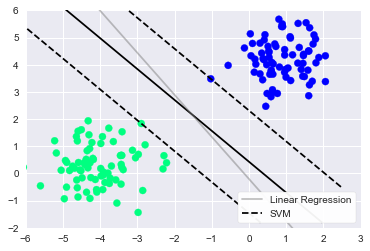

In [12]:
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_blobs

# many possible lines to separate the data
X, y = make_blobs(n_samples=150, centers=2,
                  random_state=3, cluster_std=0.70)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

clf = SVC(kernel='linear')
clf.fit(X, y)

plots.draw_svm_decission_function(clf, colors='black', label='SVM')

reg = linear_model.LinearRegression()
reg.fit(X, y)

plots.draw_linear_regression_function(reg, label='Linear Regression', color='gray', alpha=0.5)

plt.xlim([-6, 3])
plt.ylim([-2, 6])
plt.legend(loc='lower right', frameon=True, framealpha=0.95, facecolor='white')

So far the data has still been separable by a linear function. 

For many problems in real life however this isn't the case. 

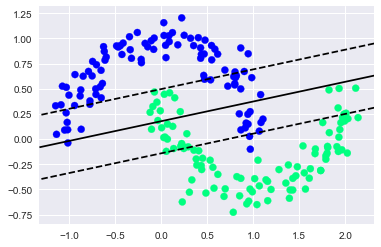

In [13]:
from sklearn.datasets.samples_generator import make_moons

X, y = make_moons(n_samples=200, noise=0.10)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

clf = SVC(kernel='linear')
clf.fit(X, y)
plots.draw_svm_decission_function(clf, colors='black', label='SVM')


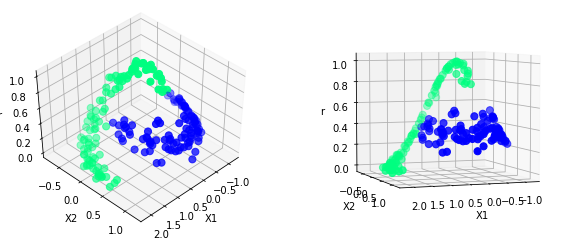

In [14]:
from mpl_toolkits import mplot3d
sns.reset_orig()

# add a dimension by applying a transformation on the two variables in the data. 
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='winter')
ax.view_init(elev=45, azim=45)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('r')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='winter')
ax.view_init(elev=5, azim=70)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('r')


In [15]:
sns.set(context='notebook')

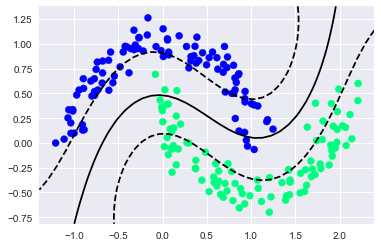

In [16]:
X, y = make_moons(n_samples=200, noise=0.10)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

clf = SVC(kernel='rbf') #use the radial basis function instead of the linear one.
clf.fit(X, y)
plots.draw_svm_decission_function(clf, colors='black', label='SVM')

The same approach works for other linear methods as well. 

What makes SVM's so special?:

+ SVM's have proven to perform very well for many use-cases.

+ SVM's handle large number of dimensions relativly fast.

+ The kernel functions basically come for free.

+ Easily extendable to multi-class problems.


Kernel functions are constrained to fulfill certain criteria. *(See Chapter 12.3.1 in the Book)*

##### Excersise 2: SVM and Titanic (10  minutes)

Use scikit-learn's SVC implementation on the Titanic dataset.

1. Read the dataset using Pandas and convert non numeric types (string etc.. to numbers) and drop missing data.

        data = pd.read_csv('../resources/titanic_train.csv', index_col='PassengerId').dropna(subset=['Age'])
        ...
            
2. Create the $X$ matrix using 'Sex,Fare,Age,Class' and the output (label) vector $Y$
        
        X = data[[...]]
        Y = data['Survived']
        X_train, X_test, y_train, y_test = train_test_split(X, y)

        
3. Use scikit-learn's SVC with the 'linear' and another kernel function

        reg_linear = SVC(kernel='linear')
        reg_linear.fit...
        reg_linear.predict...
        
4. Plot the number of correctly and falsely predicted events for both predictors.

        from sklearn.metric import confusion_matrix
        m = confusion_matrix(y_true, y_predicted)

In [22]:
np.random.seed(1234)
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from ml_helpers import plots

data = read_titanic()

X = data[['Sex_Code', 'Pclass_Code', 'Fare', 'Age']]
y = data['Survived_Code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


#Use linear kernel
reg = SVC(kernel='linear')
reg.fit(X_train, y_train)
prediction_linear = reg.predict(X_test)

#Use the rbf kernel
reg_rbf = SVC(kernel='rbf')
reg_rbf.fit(X_train, y_train)
prediction_rbf = reg_rbf.predict(X_test)

(0, 300)

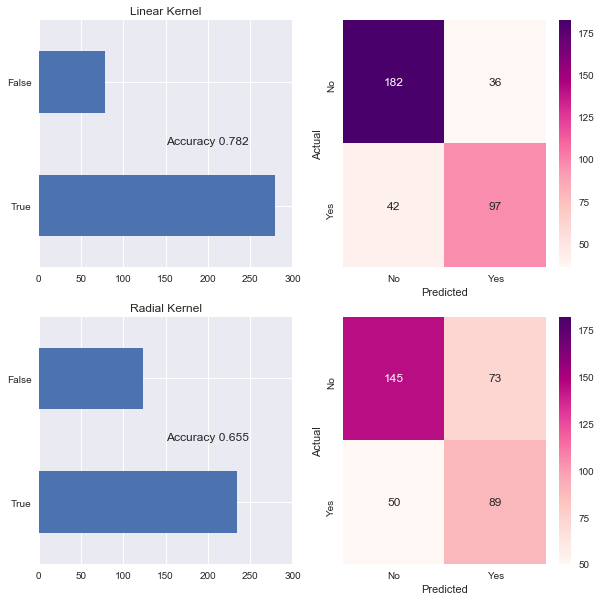

In [23]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(10, 10))
plots.plot_bars_and_confusion(truth=y_test, prediction=prediction_linear, axes=[ax1, ax2], vmin=0, vmax=182)
plots.plot_bars_and_confusion(truth=y_test, prediction=prediction_rbf, axes=[ax3, ax4], vmin=0, vmax=182)
ax1.set_title('Linear Kernel')
ax3.set_title('Radial Kernel')
ax1.set_xlim([0, 300])
ax3.set_xlim([0, 300])

##### Extending SVMs to more dimensions

The Titanic dataset we looked at in the previous excercise had four observed variables or dimensions and 714 observations in total. 

        > X = data[['Sex_Code', 'Pclass', 'Fare', 'Age']]
        > X.shape
        (714, 4)

Now we take a dataset that has 64 variables. 

([], <a list of 0 Text yticklabel objects>)

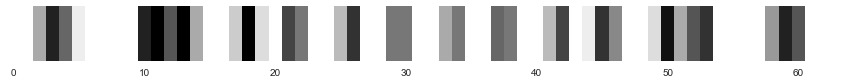

In [24]:
from sklearn import datasets, svm, metrics
X, y = datasets.load_digits(return_X_y=True)
plt.figure(figsize=(15, 1))
plt.imshow([X[0]], aspect='auto', cmap='gray_r',)
plt.grid('off')
plt.yticks([])



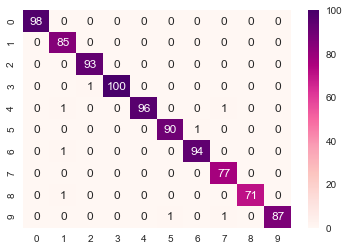

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X, y = datasets.load_digits( return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

#SVC with default settings.
clf = svm.SVC(kernel='poly')

# We learn the digits on the first half of the digits
clf.fit(X_train, y_train)

# Now predict the value of the digit on the test sample
y_prediction = clf.predict(X_test)

cm = confusion_matrix(y_test, y_prediction)

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='RdPu',
)

__What mystery data did we just classifiy?__

The SVM can easily classifiy a dataset of many observables and target classes.

This data set had 64 observables and 10 different classes.

Lets take the 64 numbers in the single observations and plot them into a $8\times8$ grid

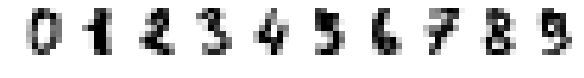

In [26]:
X, y = datasets.load_digits(return_X_y=True)

fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i, x_i in enumerate(X[:10]):
    ax = axs[i]
    img = x_i.reshape(-1, 8)
    ax.imshow(img, cmap='gray_r', interpolation='nearest')
    ax.grid('off')
    ax.axis('off')

This classifier just performed image recognition on raw image inputs without any feature engineering.

In fact we just created a simple neural network model.

Neural networks and SVMs are very similar in nature. They use slightly modified loss functions.

See Stanfords computer science lecture CS231n for more information especially the chapter on linear classification

[http://cs231n.github.io](http://cs231n.github.io)

## Local Optimization and Decission Trees

So far we looked at loss functions which optimized some global optimization criterion.

In cases of non-linearity some a priori knowledge is necessary to transform the data to make it seperable by a hyperplane. (or you can use *Deep Learning*)


Idea:
* Split the parameter space into many subspaces where observations of the same class live.

Problem:
* Finding the *best* set of subspaces in the parameter space is an NP-complete problem (Its hard to solve. Really hard.)

One can however try approximate the solution using binary recursive splits in the parameter space.

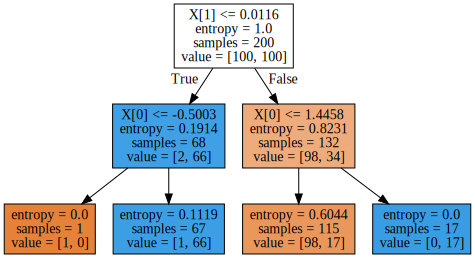

In [28]:
np.random.seed(1234)
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn import tree
import graphviz

X, y = make_moons(n_samples=200, noise=0.10)
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf.fit(X, y)

d = tree.export_graphviz(
                clf, 
                out_file=None,   
                filled=True,  
) 
graphviz.Source(d)

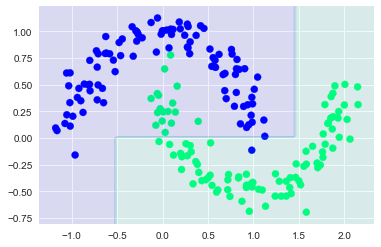

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plots.draw_decission_boundaries(clf)

Outline for a tree building algorithm.

        def build_tree(space)
            if stopping_criterion_fulfilled():
                return {}
             
            variable, split_point = find_best_split(space)
                        
            left, right = split_space(space, variable, split_point)

            left_tree = build_tree(left)
            right_tree = build_tree(right)
               
            return {'node' : (variable, split_point), 'left': left_tree, 'right': right_tree}
            

For classification the best split in a node $m$ of the tree is found by minimizing an impurity measure $Q_m$.

Popular once include Information Gain, Cross-Entropy or Gini index. 

They all work by looking at one variable at a time and then iterating over all the possible splits to find the minimal $Q_m$

Implementations across languages/libraries are similar but differ in their choice of $Q_m$ and handling of continous variables.

##### Excersise 3: Decission Trees and Titanic (15  minutes)

Use scikit-learn to find the best possible decission tree for the Titanic dataset.

1. Read the dataset using Pandas.
2. Split into training and test data.
3. Use scikit-learn's DecissionTreeClassifier on the titanic dataset.
4. Train one decission tree for all combinations of criterion = ['entropy', 'gini'] and max_depth=[1, .., 20]
5. Plot the accuracy of each predictor into a heatmap-like figure. 

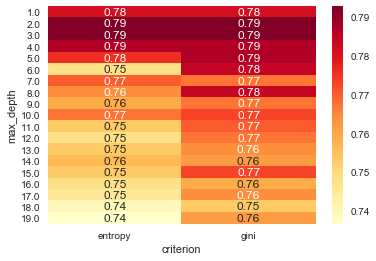

In [36]:
np.random.seed(1234)
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
data = read_titanic()

X = data[['Sex_Code', 'Pclass_Code', 'Fare', 'Age']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

df =  pd.DataFrame()
ps = ParameterGrid({'max_depth' : range(1, 20), 'criterion' : ['entropy', 'gini']})
for d in ps:
    clf = DecisionTreeClassifier(max_depth=d['max_depth'], criterion=d['criterion'])
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    df = df.append({'max_depth': d['max_depth'], 'criterion': d['criterion'], 'accuracy': acc}, ignore_index=True)

df = df.pivot('max_depth', 'criterion', 'accuracy')
sns.heatmap(df, cmap='YlOrRd', annot=True)



## Classifier Validation 


#### Overfitting (Bias-Variance Tradeoff)

The k- Nearest Neighbour classifier is  a good example of a model that can be easily overfitted.

Lets assume that the decission function is constant in $x$ over some local region in the parameter space:

$$
f(x) = \hat{y} = \frac{1}{k} \sum_{x_i \in N_k(x)} y_i
$$

where $x_i \in N_k(x)$ describes the $k$ points in the training data $\mathbf{X}$ that are in the *neighbourhood* of $x$.

To put it in words. We assume $x$ will have the same $y$ as other points nearby.

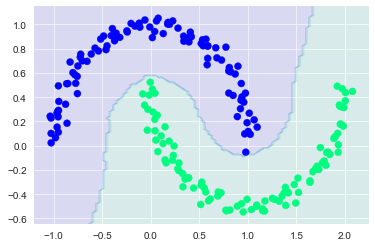

In [37]:
from sklearn.datasets.samples_generator import make_moons
from sklearn.neighbors import KNeighborsClassifier

X, y = make_moons(n_samples=200, noise=0.05)


knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plots.draw_decission_boundaries(knn)

This works pretty well in this artifical, low-noise, example. 

Classification on noisy data will not work as perfectly.


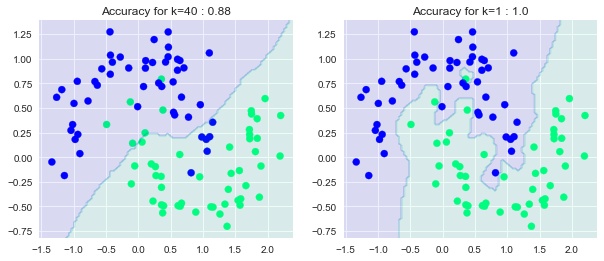

In [33]:
np.random.seed(1234)
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

X, y = make_moons(n_samples=100, noise=0.2)

knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X, y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plots.draw_decission_boundaries(knn, ax=ax1)
ax1.set_title('Accuracy for k=40 : {}'.format(accuracy_score(y, knn.predict(X))))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

ax2.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plots.draw_decission_boundaries(knn, ax=ax2)
ax2.set_title('Accuracy for k=1 : {}'.format(accuracy_score(y, knn.predict(X))))

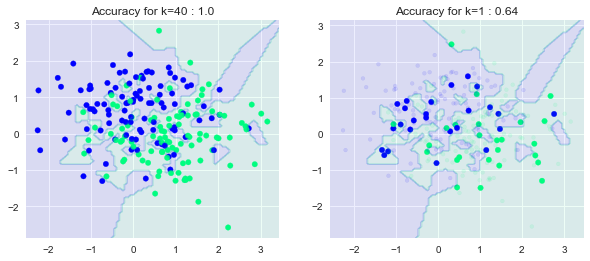

In [34]:
np.random.seed(1234)

X, y = make_moons(n_samples=200, noise=0.7)
X_test, y_test = make_moons(n_samples=50, noise=0.7)


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='winter')
plots.draw_decission_boundaries(knn, ax=ax1)
ax1.set_title('Accuracy for k=40 : {}'.format(accuracy_score(y, knn.predict(X))))

ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=30, cmap='winter')
ax2.scatter(X[:, 0], X[:, 1], c=y, s=15, alpha=0.1,  cmap='winter')
plots.draw_decission_boundaries(knn, ax=ax2)
ax2.set_title('Accuracy for k=1 : {}'.format(accuracy_score(y_test, knn.predict(X_test))))

Reducing the number of neighbours per sample $k$ will improve the classification.

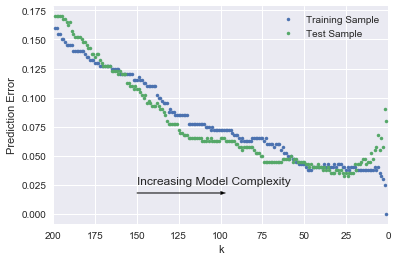

In [35]:
from sklearn.metrics import mean_squared_error

np.random.seed(1234)
X, y = make_moons(n_samples=400, noise=0.2)
X_test, y_test = make_moons(n_samples=400, noise=0.2)

e_train = []
e_test = []
for k in range(1, 200):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    e_train.append(mean_squared_error(y, knn.predict(X)))
    e_test.append(mean_squared_error(y_test, knn.predict(X_test)))

plt.plot(range(1, 200), e_train,'.', label='Training Sample')
plt.plot(range(1, 200), e_test, '.' ,label='Test Sample', )
plt.xlim(200, 0)
plt.xlabel('k')
plt.ylabel('Prediction Error')

plt.text(150, 0.026, 'Increasing Model Complexity')
plt.arrow(150, 0.018, -50, 0, width = 0.0005, head_width=0.003, head_length=3, fc='k', ec='k')
plt.legend()

Assume you have $y$ generated by a function $f(x)$ with added gaussian noise $\epsilon$

$$
y = f(x) + \epsilon, \epsilon \propto \mathbf{N}(\mu=0, \sigma)
$$

Lets look at the mean squared error (mse) of the the predictor function $\hat{f}(x) = \hat{y}$.

$$
mse = (y - \hat{f}(x))^2
$$

### Improving Variance by Randomness

#### Random Forests